# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017?

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot).

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature.

6. Solve for the R^2 score of the linear model used to predict temperature.

7. Identify if the model is a good model and why.



-----


Bonus 1 : What is your name?

If **you're the only one in the class** that answers Bonus 1, **only you** get **5 points**. 

If **everyone in the class** answers Bonus 1, **you all** get **0 points**.

If **no one in the class** answers Bonus 1, **everyone** gets **2 points**.

*Don't worry, your answer here will not be disclosed to the class*

----

**Submit this file on Moodle on the submission link I will provide. This is due September 13 12nn.**

In [1]:
#Student: Mike del Casitllo, 151371, 4 BS ITE

%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [3]:
#What is the dimensionality or shape of the data?
df.shape

(90565, 11)

In [4]:
#What is mean temperature for the year 2017?
twentyseventeen = df[df["datetime"].astype(str).str.contains("^2017")]
                                                        #just found out regex
                                                        #is supported yay huhu
mean_temp_2017 = np.mean(twentyseventeen["temperature"])
mean_temp_2017

27.93335635359116

In [5]:
#Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.

#tried to clean the numbers just in case
df["wind_direction"] = pd.to_numeric(df["wind_direction"], errors="coerce")
df["wind_speed"] = pd.to_numeric(df["wind_speed"], errors="coerce")
df["gust_speed"] = pd.to_numeric(df["gust_speed"], errors="coerce")
df["sea_level_pressure"] = pd.to_numeric(df["sea_level_pressure"], errors="coerce")
df["temperature"] = pd.to_numeric(df["temperature"], errors="coerce")
df["precipitation"] = pd.to_numeric(df["precipitation"], errors="coerce")
df["visibility"] = pd.to_numeric(df["visibility"], errors="coerce")
df["humidity"] = pd.to_numeric(df["humidity"], errors="coerce")

#useless columns because they're all NaN: gust_speed, altitude, precipitation

'''
I decided only to take the columns below since 
categorical data including datetime may not
be very significant on the data and in
doing linear regression

also I couldnt dropna so i just droped
all the NaN :(
'''

# df = df.dropna()
useful_columns = df[[
    "wind_direction",
    "wind_speed",
    "sea_level_pressure",
    "temperature",
    "visibility",
    "humidity",
]]
useful_columns = useful_columns.dropna()

from sklearn.linear_model import LinearRegression

X = useful_columns[[
    "wind_direction",
    "wind_speed",
    "sea_level_pressure",
#     "temperature",
    "visibility",
    "humidity",
]]

linear_model = LinearRegression()
linear_model.fit(X, useful_columns["temperature"])

pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,wind_direction,0.001711
1,wind_speed,0.086733
2,sea_level_pressure,-0.000075
3,visibility,0.104276
4,humidity,-10.864663


Text(0.5,1,'Relationship between Humidity and Temperature')

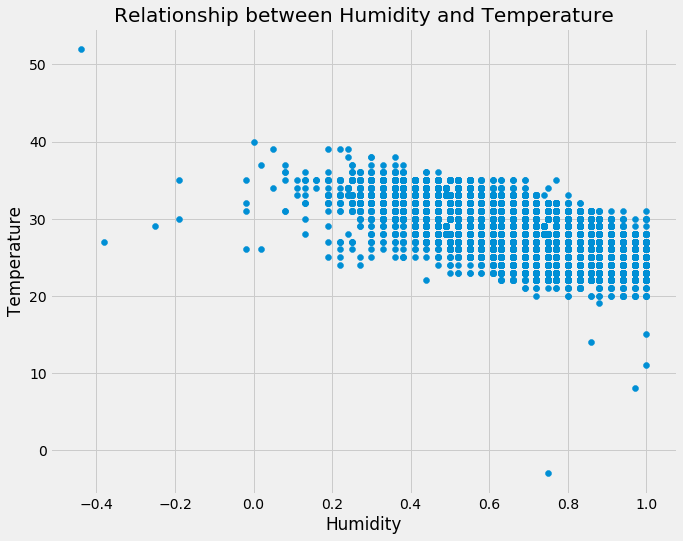

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df["humidity"], df["temperature"])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Relationship between Humidity and Temperature")

In [7]:
#Solve for the Mean Squared Error of your predicted temperature against the actual temperature.

predictions = linear_model.predict(X)
df["PRED"] = predictions
# df[["temperature", "PRED"]]

mean_squared_error = np.mean((df["temperature"] - df["PRED"]) ** 2)
mean_squared_error

2.769320536176346

In [8]:
#Solve for the R^2 score of the linear model used to predict temperature.

#omg i think this is how u do it right
linear_model.score(X, df["PRED"])

1.0

In [9]:
#Identify if the model is a good model and why.

'''
Given the low mean squared error, this means that the model is a good model. 
This means that the predicted temperature is around 0 to 3 (not inclusive) 
degrees off from the actual temperature on average. 
'''

'\nGiven the low mean squared error, this means that the model is a good model. \nThis means that the predicted temperature is around 0 to 3 (not inclusive) \ndegrees off from the actual temperature on average. \n'

In [10]:
#I will not give my name for the bonus